In [1]:
from IPython.display import display
import pandas as pd
from datetime import datetime
import yfinance as yf
from matplotlib import pyplot as plt

## Defining Current Portfolio

In [2]:
equities_strategyA = [
    'ARNC',
    'ABT',
    'ADSK',
    'ADBE',
    'ADI',
    'AEP',
    'AES',
    'AFL',
    'AMD',
    'ADP'
]

equities_strategyB = [
    'ENDP',
    'MDCO',
    'WW',
    'STMP',
    'INFN',
    'SEMG',
    'MIK',
    'RETA',
    'CLDR',
    'HOME',
]




current_B = pd.DataFrame([95480,
8700,
12880,
5400,
79540,
27880,
52900,
2180,
52840,
51780],
                        index = equities_strategyB,
                        columns = ['Shares Holding'])

current_A = pd.DataFrame([15860,
6160,
2520,
2720,
3620,
3620,
21800,
6760,
14840,
2600], 
                        index = equities_strategyA,
                        columns = ['Shares Holding'])

Note that all shares were bought on November 10th.

In [3]:
current_B['BuyPrice'] = [
    4.33,
    55.01,
    34.27,
    91.50,
    5.30,
    16.07,
    9.08,
    209.88,
    8.75,
    8.71,
]

current_A['BuyPrice'] = [
    28.97,
    83.74,
    152.96,
    292.02,
    113.02,
    89.02,
    17.64,
    54.14,
    36.26,
    162.73,
]

In [4]:
portfolio = pd.concat([current_A, current_B], axis=0)
portfolio

,Shares Holding,BuyPrice
ARNC,15860,28.97
ABT,6160,83.74
ADSK,2520,152.96
ADBE,2720,292.02
ADI,3620,113.02
AEP,3620,89.02
AES,21800,17.64
AFL,6760,54.14
AMD,14840,36.26
ADP,2600,162.73


## Getting Historical Data

In [7]:
end = datetime.now().strftime("%Y-%m-%d")
start = '2019-11-10'


historical_data = yf.download(list(portfolio.index),
                             start,
                             end)['Close'].ffill()

[*********************100%***********************]  20 of 20 completed


In [8]:
historical_data

,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,AMD,ARNC,CLDR,ENDP,HOME,INFN,MDCO,MIK,RETA,SEMG,STMP,WW
Date,,,,,,,,,,,,,,,,,,,,
2019-11-11,83.760002,290.269989,112.550003,163.419998,152.919998,88.769997,17.930000,54.029999,36.310001,29.510000,8.74,4.11,8.66,5.27,55.369999,9.160,213.669998,15.90,89.290001,33.730000
2019-11-12,84.339996,291.720001,113.260002,166.360001,158.059998,88.500000,18.059999,53.970001,36.709999,29.500000,8.67,4.14,8.64,5.39,53.389999,9.150,182.830002,15.62,87.650002,34.509998
2019-11-13,84.220001,293.540009,114.169998,168.979996,159.210007,89.860001,18.150000,54.139999,37.520000,29.500000,8.48,4.29,8.55,6.00,52.810001,8.940,187.479996,14.85,85.919998,35.080002
2019-11-14,84.120003,294.529999,113.320000,170.139999,158.139999,89.599998,18.410000,54.180000,38.349998,30.219999,8.54,4.16,8.66,6.36,50.889999,8.640,203.440002,14.89,85.769997,35.720001
2019-11-15,85.709999,297.500000,113.400002,171.169998,161.750000,89.559998,18.450001,54.400002,38.560001,30.860001,8.76,4.53,9.20,6.71,51.980000,8.720,198.910004,15.20,85.699997,36.360001
2019-11-18,84.260002,297.160004,111.970001,170.729996,162.440002,90.150002,18.490000,54.389999,39.880001,31.059999,8.87,4.46,8.95,6.80,58.650002,8.430,208.440002,15.00,88.070000,37.990002
2019-11-19,84.290001,300.600006,111.709999,171.089996,164.529999,90.669998,18.480000,54.080002,41.290001,31.010000,8.93,4.45,8.57,6.65,70.209999,8.000,206.000000,15.03,87.010002,40.410000
2019-11-20,83.889999,300.100006,108.580002,170.580002,165.330002,91.459999,18.600000,54.130001,40.980000,30.830000,9.39,4.67,7.98,6.65,70.589996,7.800,212.889999,15.00,86.709999,41.000000
2019-11-21,83.680000,298.799988,108.779999,169.860001,165.050003,91.070000,18.500000,53.869999,39.520000,30.610001,9.15,4.55,8.09,6.51,69.760002,7.850,205.809998,15.42,89.199997,40.840000


In [9]:
pnl = historical_data - portfolio['BuyPrice']
pnl = pnl*portfolio['Shares Holding']

## Plotting Returns

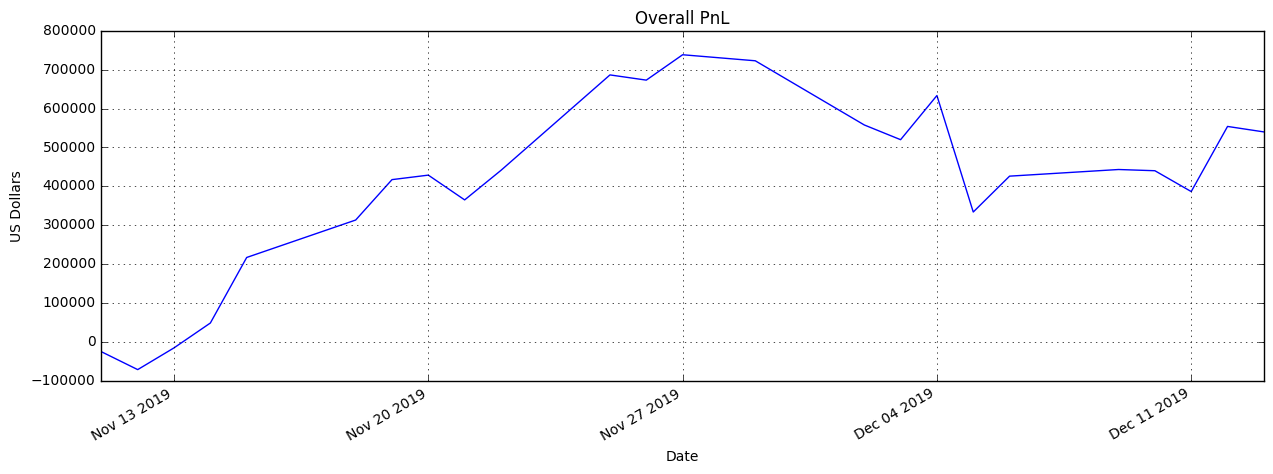

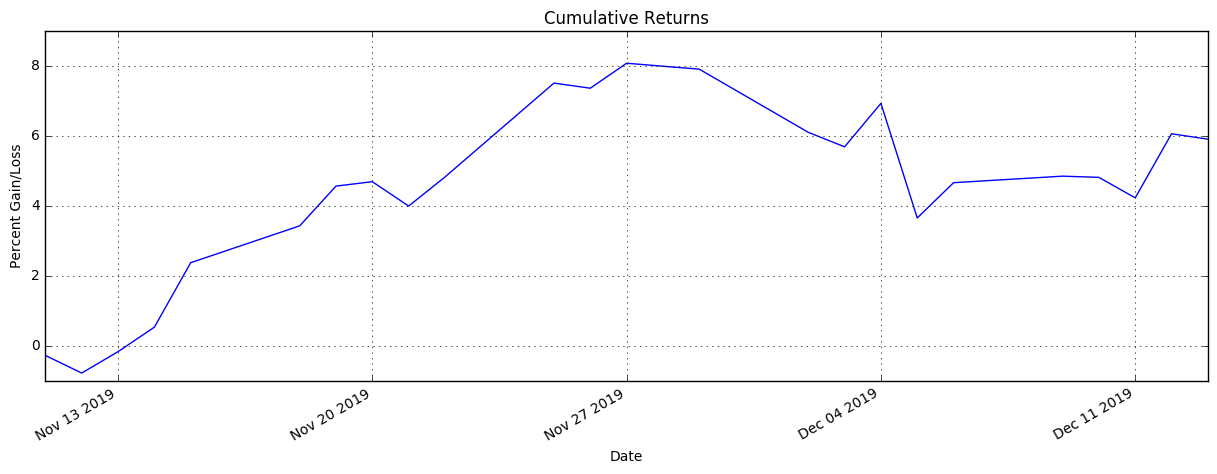

In [10]:
plt.figure(figsize=(15, 5))
pnl.sum(axis=1).plot(figsize=(15, 5), title='Overall PnL'); plt.grid(); plt.ylabel('US Dollars')


plt.figure(figsize=(15, 5))
(100 * pnl.sum(axis=1)/(portfolio['BuyPrice']*portfolio['Shares Holding']).sum()).plot(
figsize=(15, 5), title='Cumulative Returns'); plt.grid(); plt.ylabel('Percent Gain/Loss')

plt.show()
